In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
electricity = pd.read_csv('./Electric_Production.csv')

In [3]:
df = pd.DataFrame()
df['date'] = pd.to_datetime(electricity['DATE'], format='%m/%d/%Y')
df['electricity'] = electricity['IPG2211A2N']
df

,date,electricity
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [4]:
df['y'] = df['electricity'].shift(-1)

In [15]:
train = df[:300]
test  = df[300:]

test = test.drop(test.tail(1).index)

test = test.copy()
test

,date,electricity,y
300,2010-01-01,119.0166,110.5330
301,2010-02-01,110.5330,98.2672
302,2010-03-01,98.2672,86.3000
303,2010-04-01,86.3000,90.8364
304,2010-05-01,90.8364,104.3538
...,...,...,...
391,2017-08-01,108.9312,98.6154
392,2017-09-01,98.6154,93.6137
393,2017-10-01,93.6137,97.3359
394,2017-11-01,97.3359,114.7212


In [20]:
X_train = train['electricity'].values.reshape(-1, 1)
y_train = train['y'].values.reshape(-1, 1)
X_test = test['electricity'].values.reshape(-1, 1)
X_test

array([[119.0166],
       [110.533 ],
       [ 98.2672],
       [ 86.3   ],
       [ 90.8364],
       [104.3538],
       [112.8066],
       [112.9014],
       [100.1209],
       [ 88.9251],
       [ 92.775 ],
       [114.3266],
       [119.488 ],
       [107.3753],
       [ 99.1028],
       [ 89.3583],
       [ 90.0698],
       [102.8204],
       [114.7068],
       [113.5958],
       [ 99.4712],
       [ 90.3566],
       [ 93.8095],
       [107.3312],
       [111.9646],
       [103.3679],
       [ 93.5772],
       [ 87.5566],
       [ 92.7603],
       [101.14  ],
       [113.0357],
       [109.8601],
       [ 96.7431],
       [ 90.3805],
       [ 94.3417],
       [105.2722],
       [115.501 ],
       [106.734 ],
       [102.9948],
       [ 91.0092],
       [ 90.9634],
       [100.6957],
       [110.148 ],
       [108.1756],
       [ 99.2809],
       [ 91.7871],
       [ 97.2853],
       [113.4732],
       [124.2549],
       [112.8811],
       [104.7631],
       [ 90.2867],
       [ 92.

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y=y_train.ravel())

gbr_pred = gbr.predict(X_test)

test['gbr_pred'] = gbr_pred
test

,date,electricity,y,gbr_pred
300,2010-01-01,119.0166,110.5330,105.541485
301,2010-02-01,110.5330,98.2672,110.836312
302,2010-03-01,98.2672,86.3000,90.387377
303,2010-04-01,86.3000,90.8364,86.688123
304,2010-05-01,90.8364,104.3538,92.065438
...,...,...,...,...
391,2017-08-01,108.9312,98.6154,103.003720
392,2017-09-01,98.6154,93.6137,90.387377
393,2017-10-01,93.6137,97.3359,91.205050
394,2017-11-01,97.3359,114.7212,96.516122


In [22]:
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y=y_train.ravel())

index = 0
X_test = np.array([test['electricity'].values[0]]).reshape(-1, 1)
while index < 1000:
    gbr_pred = gbr.predict(X_test)
    index += 1
    print(gbr_pred)
    X_test = gbr_pred.reshape(-1, 1)

[105.5414848]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.33534971]
[107.30917236]
[104.28430205]
[101.03521011]
[104.73700785]
[103.335349

In [30]:
gbr.predict(np.array([110.5330]).reshape(-1, 1))

array([110.83631193])

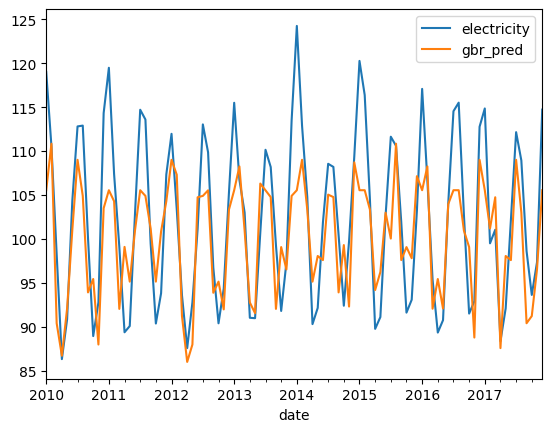

In [9]:
test.plot(kind='line', x='date', y=['electricity', 'gbr_pred'])
plt.show()

In [10]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [12]:
gbr_mape = mape(test['electricity'], test['gbr_pred'])

x = ['Gradient Boosting']
y = [gbr_mape]

for i in range(len(x)):
    print(x[i], y[i])

Gradient Boosting 4.91
